In [1]:
import tensorflow.keras as keras
from tensorflow.keras import initializers,regularizers
from tensorflow.keras.layers import Dense, Dropout, Flatten, Input, Concatenate, BatchNormalization, LeakyReLU
from tensorflow.keras.models import Model, load_model
from tensorflow.keras.callbacks import EarlyStopping
import tensorflow.keras.backend as K
import math
import matplotlib.pylab as plt
import matplotlib
from random import random
from sklearn.utils import resample
import seaborn as sns
import corner
import pickle
from methods import *
from sklearn.ensemble import BaggingRegressor
from sklearn.tree import DecisionTreeRegressor

In [2]:
rs = 30

In [3]:
import numpy as np
import pandas as pd

In [4]:
from numpy.random import seed
seed(1)
from tensorflow.random import set_seed
set_seed(2)

## Read in the files

In [5]:
iron = pd.read_csv('files/Iron.csv')
proton = pd.read_csv('files/Proton.csv')
helium = pd.read_csv('files/Helium.csv')
oxygen = pd.read_csv('files/Oxygen.csv')
proton2 = pd.read_csv('files/Proton2.csv')
iron2 =  pd.read_csv('files/Iron2.csv')
proton3 = pd.read_csv('files/Proton3.csv')
iron3 = pd.read_csv('files/Iron3.csv')
proton4 = pd.read_csv('files/Proton4.csv')
iron4 = pd.read_csv('files/Iron4.csv')

In [6]:
iron_cut1 = cut_values(np.log10(iron['energy'].values))
proton_cut1 = cut_values(np.log10(proton['energy'].values))
helium_cut1 = cut_values(np.log10(helium['energy'].values))
oxygen_cut1 = cut_values(np.log10(oxygen['energy'].values))

In [7]:
data = pd.read_csv('files/data.csv')

In [8]:
iron.keys()

Index(['Unnamed: 0', 'mass', 'energy', 'zenith', 'S125', 'energy_loss',
       'he_stoch', 'he_stoch2', 'Xmax', 'Xo', 'A', 'm_125', 'm_r', 'm_s',
       'm_s2', 'm_o', 'm_chi2', 'fit_status_m', 's_r', 's_o', 's_mean',
       's_std', 's_chi2', 'fit_status_s', 'charge', 'N', 'ghRedChiSqr',
       'firstint', 'max_check', 'new_xmax', 'new_xo', 'new_lambda',
       'fit_status', 'new_chi2', 'difference', 'MaxNum', 'waveform_weight',
       'muon_total'],
      dtype='object')

## Apply the cuts from the above functions

In [9]:
iron = new_df(iron,4)
proton = new_df(proton,1)
helium = new_df(helium,2)
oxygen = new_df(oxygen,3)
proton2 = new_df(proton2,1)
iron2 = new_df(iron2,4)
proton3 = new_df(proton3,1)
iron3 = new_df(iron3,4)
proton4 = new_df(proton4,1)
iron4 = new_df(iron4,4)

/home/andy/anaconda3/lib/python3.7/site-packages/pandas/core/series.py:726: RuntimeWarning: divide by zero encountered in log10
  result = getattr(ufunc, method)(*inputs, **kwargs)
/home/andy/anaconda3/lib/python3.7/site-packages/pandas/core/series.py:726: RuntimeWarning: divide by zero encountered in log10
  result = getattr(ufunc, method)(*inputs, **kwargs)
/home/andy/anaconda3/lib/python3.7/site-packages/pandas/core/series.py:726: RuntimeWarning: divide by zero encountered in log10
  result = getattr(ufunc, method)(*inputs, **kwargs)
/home/andy/anaconda3/lib/python3.7/site-packages/pandas/core/series.py:726: RuntimeWarning: divide by zero encountered in log10
  result = getattr(ufunc, method)(*inputs, **kwargs)
/home/andy/anaconda3/lib/python3.7/site-packages/pandas/core/series.py:726: RuntimeWarning: divide by zero encountered in log10
  result = getattr(ufunc, method)(*inputs, **kwargs)
/home/andy/anaconda3/lib/python3.7/site-packages/pandas/core/series.py:726: RuntimeWarning: div

In [10]:
iron_cut2 = cut_values(np.log10(iron['energy'].values))
proton_cut2 = cut_values(np.log10(proton['energy'].values))
helium_cut2 = cut_values(np.log10(helium['energy'].values))
oxygen_cut2 = cut_values(np.log10(oxygen['energy'].values))

In [11]:
proton_cut1,proton_cut2

([2157, 2229, 2159, 1382, 956, 906, 825, 995, 969, 1097],
 [541, 667, 523, 494, 481, 411, 353, 374, 285, 301])

In [12]:
data = new_df_data(data)

/home/andy/anaconda3/lib/python3.7/site-packages/pandas/core/series.py:726: RuntimeWarning: divide by zero encountered in log10
  result = getattr(ufunc, method)(*inputs, **kwargs)


In [13]:
df = iron.append(proton)
df = df.append(helium)
df = df.append(oxygen)
#df = df.append(proton2)
#df = df.append(iron2)
#df = df.append(proton3)
#df = df.append(iron3)
#df = df.append(proton4)
#df = df.append(iron4)

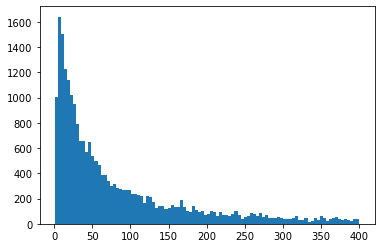

In [14]:
plt.hist(df['ghRedChiSqr'],bins=100)
plt.show()

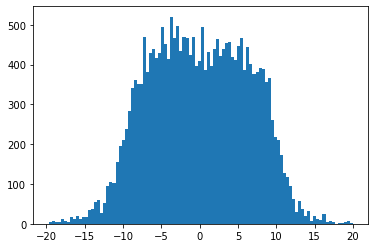

In [15]:
plt.hist(df['max_check'][abs(df['max_check'])<20],bins=100)
plt.show()

## Plots to understand the distributions of the variables

In [16]:
df['log_energy'] = df['log_energy'].values

In [17]:
df.head()

,Unnamed: 0,mass,energy,zenith,S125,energy_loss,he_stoch,he_stoch2,Xmax,Xo,...,log_muon_total,log_energy_loss,log_m_r,log_s_r,log_charge,log_A,new,new_s125,delta_L,new_waveform_weight
0,0,4,33181566.0,0.382189,1.562163,189.121448,3,1,554.648804,19.267458,...,5.613598,2.276741,-3.202906,-5.269070,3.139204,-3.196973,30.399626,0.762779,504.981720,0.825862
2,2,4,33181566.0,0.380478,1.568851,186.599907,3,1,554.648804,19.267458,...,5.613598,2.270911,-3.361286,-7.705093,3.287585,-3.313512,30.399626,0.848921,504.981720,1.280572
3,3,4,33181566.0,0.384414,1.596185,144.241157,4,0,554.648804,19.267458,...,5.613598,2.159089,-3.077271,-3.379087,2.981812,-3.233955,30.399626,0.863148,504.981720,1.675668
8,8,4,2711675.5,0.263115,0.265329,39.813381,4,0,417.665802,-90.138275,...,4.597947,1.600029,-2.051560,-2.592288,2.171721,-3.291783,96.511151,1.077862,411.292926,42.283037
9,9,4,2711675.5,0.254331,0.261551,41.602532,2,0,417.665802,-90.138275,...,4.597947,1.619120,-2.348212,-2.661562,2.458711,-3.187719,96.511151,1.067436,411.292926,26.611965


In [18]:
check = [math.isnan(i)==0 for i in df['log_energy_loss'].values]

In [19]:
check_data = [math.isnan(i)==0 for i in data['log_energy_loss'].values]

In [20]:
df_coinc = df[check]

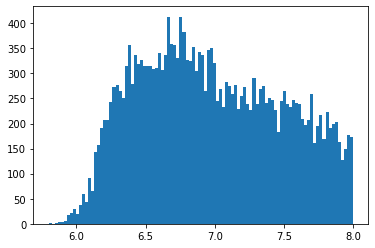

In [21]:
plt.hist(df_coinc['log_energy'],bins=100)
plt.show()

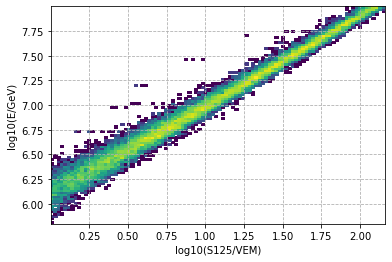

In [22]:
plt.hist2d(df_coinc['S125'],df_coinc['log_energy'],bins=100,norm = matplotlib.colors.LogNorm())
plt.ylabel('log10(E/GeV)')
plt.xlabel('log10(S125/VEM)')
plt.grid(True,linestyle = 'dashed')
plt.savefig('EvsS125.png')

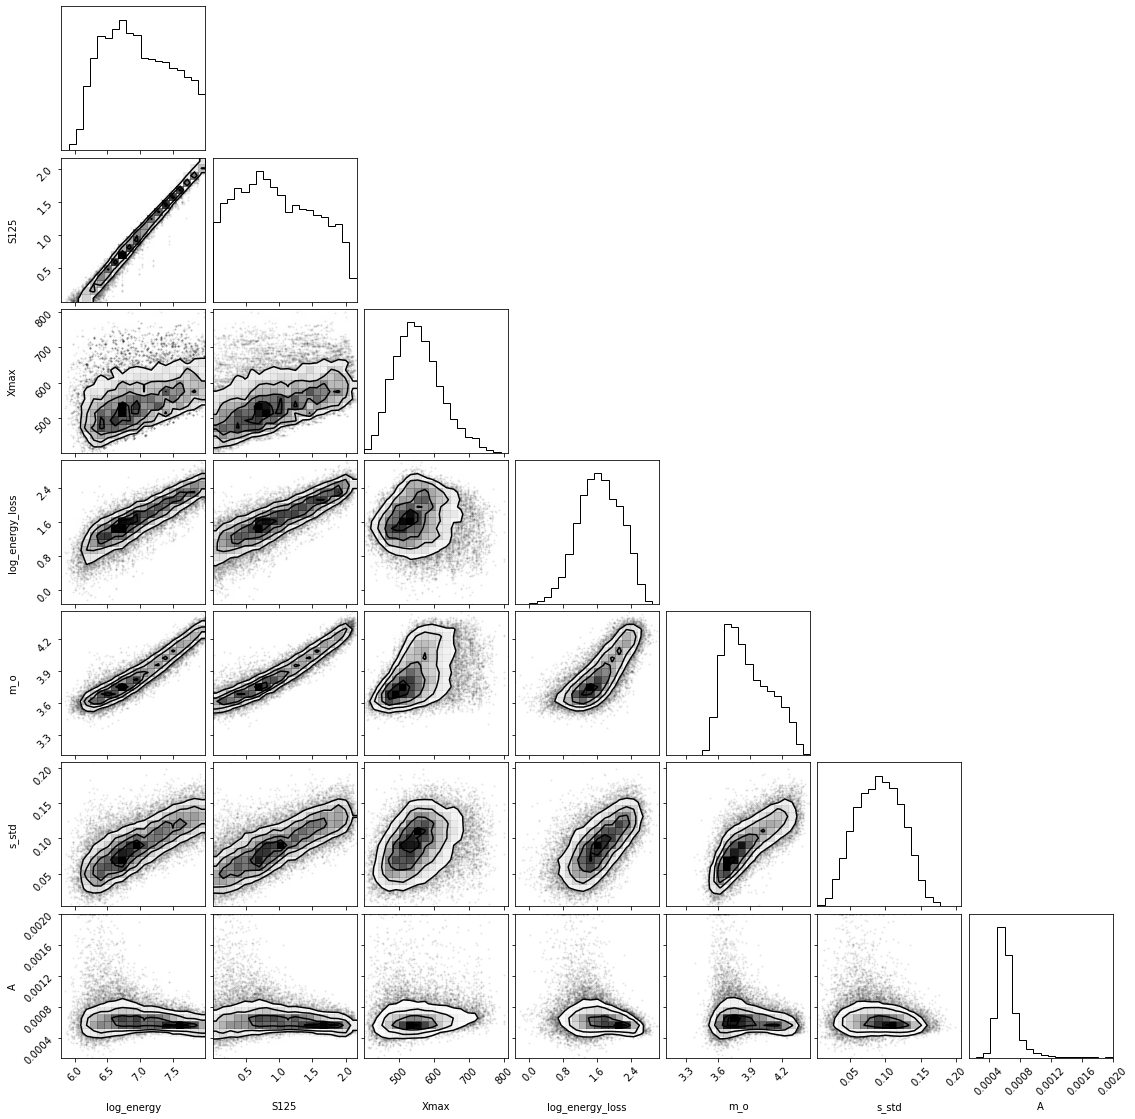

In [23]:
corner.corner(df_coinc[['log_energy','S125','Xmax','log_energy_loss','m_o','s_std','A']])
plt.savefig('corner_plot.png')

In [24]:
df_coinc = df_coinc.reset_index()

In [25]:
data_coinc = data[check_data]
data_coinc = data_coinc.reset_index()

In [26]:
df_coinc.to_csv('training.csv')

## Check Correlation Coefficients for Variables

In [27]:
df_coinc.corr()[['Xmax','log_energy','mass','Xo','log_muon_total']]

,Xmax,log_energy,mass,Xo,log_muon_total
index,2.489232e-02,-1.947243e-02,-7.251611e-02,1.406055e-02,-2.747109e-02
Unnamed: 0,2.489232e-02,-1.947243e-02,-7.251611e-02,1.406055e-02,-2.747109e-02
mass,-5.456230e-01,5.311920e-02,1.000000e+00,-2.241270e-01,2.100561e-01
energy,3.817344e-01,8.776124e-01,3.576295e-02,-7.639072e-02,8.609385e-01
zenith,1.215914e-02,-3.613732e-02,6.023167e-04,-6.207520e-02,-4.881508e-02
S125,4.464647e-01,9.916876e-01,4.029998e-02,-6.823346e-02,9.751015e-01
energy_loss,8.755353e-02,7.615566e-01,2.996759e-01,-1.877797e-01,7.896190e-01
he_stoch,6.815912e-03,3.711744e-01,1.692801e-01,-8.638707e-02,3.946287e-01
he_stoch2,-1.375384e-02,-8.840964e-02,-2.044424e-02,2.533626e-02,-8.885087e-02
Xmax,1.000000e+00,4.240239e-01,-5.456230e-01,3.626692e-01,3.366511e-01


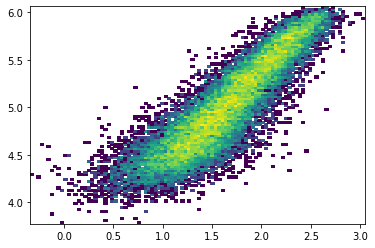

In [28]:
plt.hist2d(df_coinc['log_energy_loss'],df_coinc['log_muon_total'],bins=100,norm = matplotlib.colors.LogNorm())
plt.show()

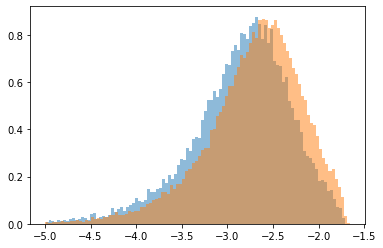

In [29]:
plt.hist(df_coinc['log_m_r'],bins=100,alpha=0.5,density=True)
plt.hist(data_coinc['log_m_r'],bins=100,alpha=0.5,density=True)
plt.show()

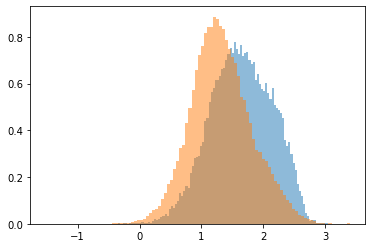

In [30]:
plt.hist(df_coinc['log_energy_loss'],bins=100,alpha=0.5,density=True)
plt.hist(data_coinc['log_energy_loss'],bins=100,alpha=0.5,density=True)
plt.show()

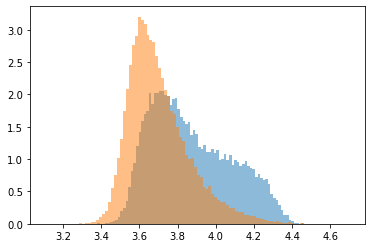

In [31]:
plt.hist(df_coinc['m_o'],bins=100,alpha=0.5,density=True)
plt.hist(data_coinc['m_o'],bins=100,alpha=0.5,density=True)
plt.show()

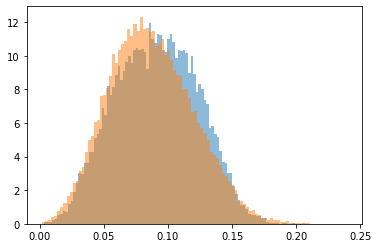

In [32]:
plt.hist(df_coinc['s_std'],bins=100,alpha=0.5,density=True)
plt.hist(data_coinc['s_std'],bins=100,alpha=0.5,density=True)
plt.show()

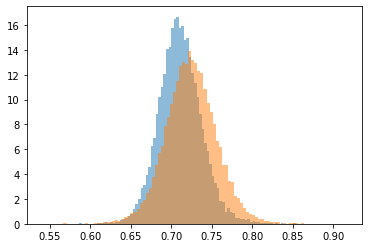

In [33]:
plt.hist(df_coinc['s_mean'],bins=100,alpha=0.5,density=True)
plt.hist(data_coinc['s_mean'],bins=100,alpha=0.5,density=True)
plt.show()

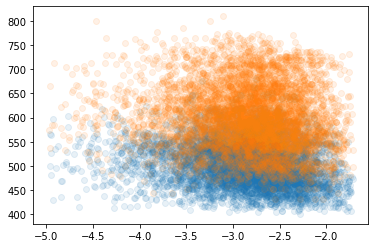

In [34]:
plt.scatter(df_coinc['log_m_r'][df_coinc['mass']==4],df_coinc['Xmax'][df_coinc['mass']==4],alpha=0.1)
plt.scatter(df_coinc['log_m_r'][df_coinc['mass']==1],df_coinc['Xmax'][df_coinc['mass']==1],alpha=0.1)
plt.show()

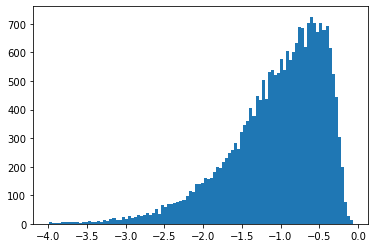

In [35]:
plt.hist(np.log10(df_coinc['m_chi2']),bins=100)
plt.show()

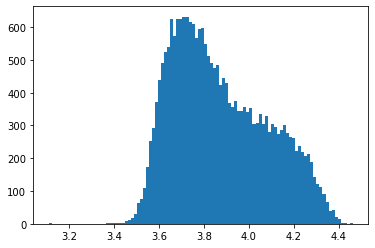

In [36]:
plt.hist(df_coinc['m_o'],bins=100)
plt.show()

In [37]:
from sklearn.linear_model import LinearRegression

In [38]:
conversion = LinearRegression()

In [39]:
conversion.fit(df_coinc['delta_L'].values.reshape(-1,1),df_coinc['Xmax'])

LinearRegression()

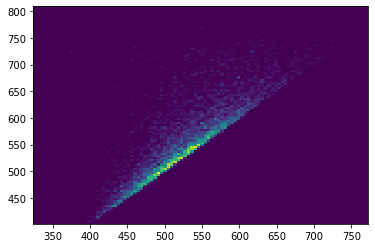

In [40]:
plt.hist2d(df_coinc['delta_L'],df_coinc['Xmax'],bins=100)
plt.show()

## Make train test splits and data

In [41]:
from sklearn.model_selection import train_test_split

In [42]:
from scipy.optimize import curve_fit

In [43]:
test = df_coinc.sample(frac=0.1,random_state=rs)

In [44]:
output_variables = ['log_energy','Xmax','Xo','log_muon_total','mass']
input_variables = ['cos_zenith','S125','log_energy_loss','he_stoch','he_stoch2','m_r','m_o','s_mean','s_std','A','waveform_weight']

In [45]:
test_y =  test[output_variables].values
test_X = test[input_variables].values

In [46]:
df_coinc = df_coinc.drop(test.index)
df_coinc = df_coinc.reset_index()

In [47]:
y = df_coinc[output_variables].values
X = df_coinc[input_variables].values

In [48]:
X_data = data_coinc[input_variables[0:-1]].values

In [49]:
X_train, X_validation, y_train, y_validation = train_test_split(X, y, test_size=0.2, random_state=rs)

In [50]:
variable = list(zip(*X_train))
#weight = np.array(variable[-1])
X_train1 = X_train[:,0:-1]
X_validation1 = X_validation[:,0:-1]

In [51]:
weight = []
for i in y_train:
    if i[0] == 1:
        weight.append(1)
    elif i[0] == 2:
        weight.append(len(proton)/len(helium))
    elif i[0] == 3:
        weight.append(len(proton)/len(oxygen))
    else:
        weight.append(len(proton)/len(iron))
weight=np.array(weight)

In [52]:
waveform_weight = []

In [53]:
for i in list(zip(*X_train))[-1]:
    if i == 0:
        waveform_weight.append(1)
        continue
    waveform_weight.append(i)
waveform_weight = np.array(waveform_weight)

In [54]:
iron_train = cut_values(y_train[:,0],mass=y_train[:,-1],mass_value=4)
proton_train = cut_values(y_train[:,0],mass=y_train[:,-1],mass_value=1)
helium_train = cut_values(y_train[:,0],mass=y_train[:,-1],mass_value=2)
oxygen_train = cut_values(y_train[:,0],mass=y_train[:,-1],mass_value=3)

In [55]:
iron_validation = cut_values(y_validation[:,0],mass=y_validation[:,-1],mass_value=4)
proton_validation = cut_values(y_validation[:,0],mass=y_validation[:,-1],mass_value=1)
helium_validation = cut_values(y_validation[:,0],mass=y_validation[:,-1],mass_value=2)
oxygen_validation = cut_values(y_validation[:,0],mass=y_validation[:,-1],mass_value=3)

In [56]:
iron_test = cut_values(test_y[:,0],mass=test_y[:,-1],mass_value=4)
proton_test = cut_values(test_y[:,0],mass=test_y[:,-1],mass_value=1)
helium_test = cut_values(test_y[:,0],mass=test_y[:,-1],mass_value=2)
oxygen_test = cut_values(test_y[:,0],mass=test_y[:,-1],mass_value=3)

In [57]:
tree2 = BaggingRegressor(DecisionTreeRegressor(splitter='best',max_features='log2',random_state=42),n_estimators=400,bootstrap=True,random_state=42)

In [58]:
tree2.fit(X_train1,y_train[:,3])

BaggingRegressor(base_estimator=DecisionTreeRegressor(max_features='log2',
                                                      random_state=42),
                 n_estimators=400, random_state=42)

In [59]:
predictions = tree2.predict(X_validation1)

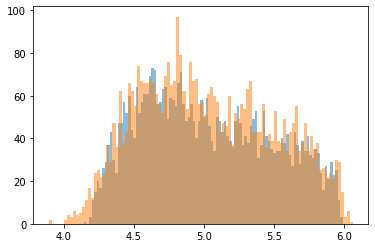

In [60]:
plt.hist(predictions,bins=100,alpha=0.5)
plt.hist(y_validation[:,3],bins=100,alpha = 0.5)
plt.show()

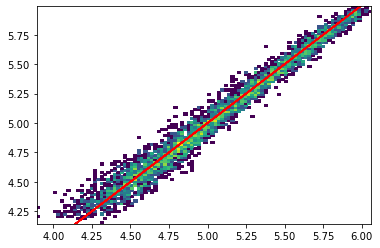

In [61]:
plt.hist2d(y_validation[:,3],predictions,bins=100,norm = matplotlib.colors.LogNorm())
plt.plot(y_validation[:,3],y_validation[:,3],color='r')
plt.show()

In [62]:
error = np.mean([(i-j)**2 for i,j in zip(y_validation[:,3],predictions)])
print(error**0.5)

0.07979397566016921


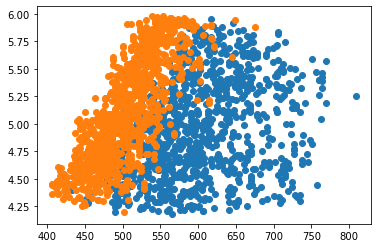

In [63]:
plt.scatter(y_validation[:,1][y_validation[:,-1]==1],predictions[y_validation[:,-1]==1])
plt.scatter(y_validation[:,1][y_validation[:,-1]==4],predictions[y_validation[:,-1]==4])
plt.show()

# Fit the Neural Network

In [64]:
model_best = 'model_coinc_best.h5'

best_model = keras.callbacks.ModelCheckpoint(model_best,
                                             monitor='val_loss',
                                             save_best_only=True,
                                             save_weights_only=False,
                                             mode='auto')

es = EarlyStopping(monitor='val_loss',patience=20,restore_best_weights=True)

input_layer = Input(shape=(len(X_train1[0]),))

model1 = BatchNormalization()(input_layer)

model1 = Dense(12,bias_regularizer=keras.regularizers.l1(1e-1))(model1)

model1 = LeakyReLU(alpha=0.2)(model1)

model2 = BatchNormalization()(model1)

model2 = Dense(7)(model2)

model2 = LeakyReLU(alpha=0.2)(model2)

model3 = Concatenate(axis=-1,activity_regularizer=keras.regularizers.l2(1e-5))([input_layer,model2])

model3 = Dropout(0.5)(model3)

model3 = BatchNormalization(renorm=True)(model3)

prediction1 = Dense(3,activation='linear',kernel_regularizer = keras.regularizers.l2(1e-5))(model3)

model = Model(inputs=input_layer,outputs=prediction1)

opt = keras.optimizers.Adam(decay=1e-5)

model.compile(optimizer=opt , loss = 'mse')


In [65]:
history = model.fit(X_train1,y_train[:,0:3],
                    epochs=500,
                    shuffle=True,
                    validation_data = (X_validation1,y_validation[:,0:3]),
                    callbacks=[best_model,es])
                    #sample_weight=waveform_weight)

Epoch 1/500
514/514 [==============================] - 1s 1ms/step - loss: 104876.8672 - val_loss: 103557.7969
Epoch 2/500
514/514 [==============================] - 1s 1ms/step - loss: 98200.9531 - val_loss: 93249.4375
Epoch 3/500
514/514 [==============================] - 1s 1ms/step - loss: 84953.6484 - val_loss: 77330.3828
Epoch 4/500
514/514 [==============================] - 1s 1ms/step - loss: 68620.7109 - val_loss: 60471.5117
Epoch 5/500
514/514 [==============================] - 1s 1ms/step - loss: 51686.8867 - val_loss: 43684.9531
Epoch 6/500
514/514 [==============================] - 1s 1ms/step - loss: 36107.2266 - val_loss: 29447.0957
Epoch 7/500
514/514 [==============================] - 1s 1ms/step - loss: 23139.5312 - val_loss: 17638.5996
Epoch 8/500
514/514 [==============================] - 1s 1ms/step - loss: 13541.8750 - val_loss: 9784.1836
Epoch 9/500
514/514 [==============================] - 1s 1ms/step - loss: 7382.4404 - val_loss: 5266.8125
Epoch 10/500
514/514

## Loss curve to observe how the network performs

In [66]:
loss = history.history['loss']
val_loss = history.history['val_loss']

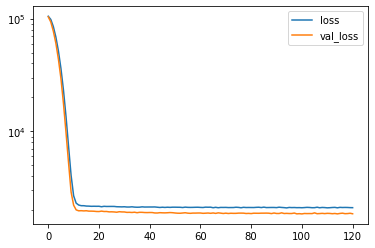

In [67]:
plt.plot(loss,label='loss')
plt.plot(val_loss,label='val_loss')
plt.legend()
plt.yscale('log')
plt.show()

In [68]:
best_model = load_model('model_coinc_best.h5')

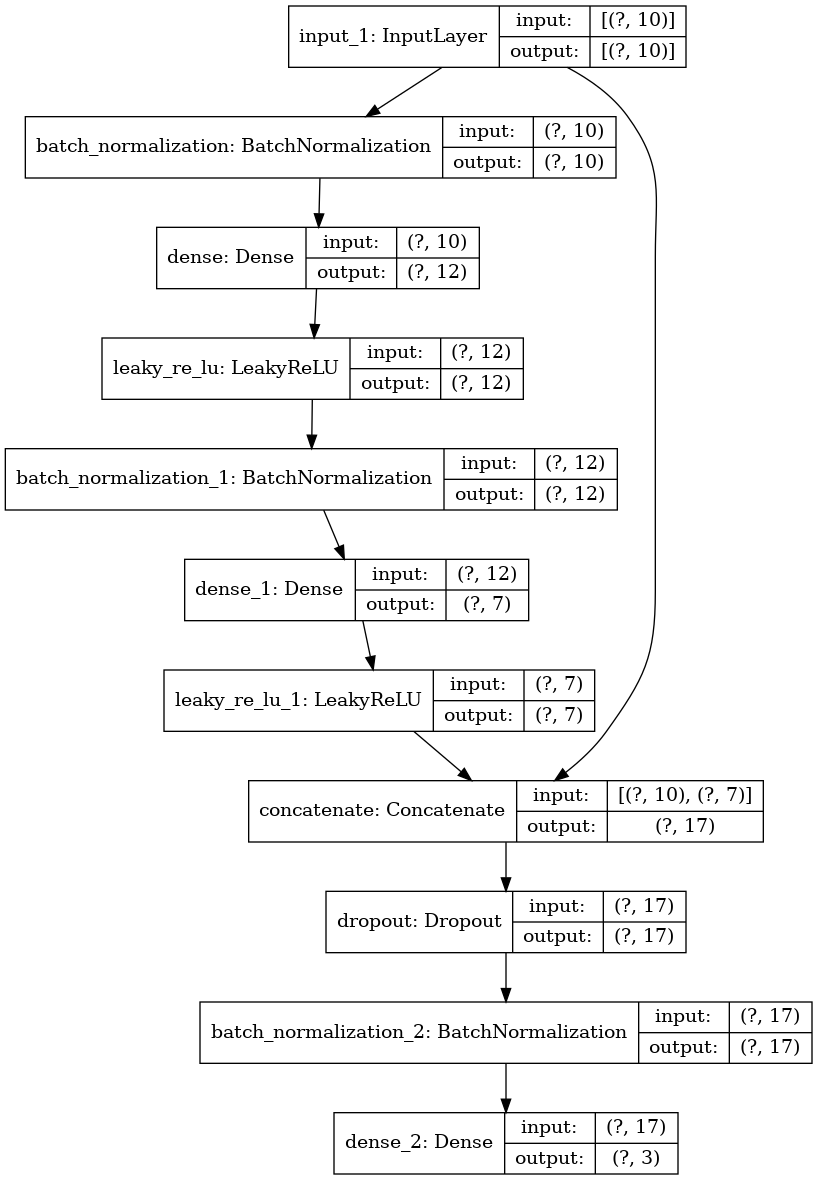

In [69]:
from tensorflow.keras.utils import plot_model
plot_model(best_model, to_file='model_plot.png', show_shapes=True, show_layer_names=True)

## Fit the Decision Tree

In [70]:
tree =BaggingRegressor(DecisionTreeRegressor(splitter='best',max_features='log2',random_state=42),n_estimators=400,bootstrap=True,random_state=42)
tree.fit(X_train1,y_train[:,0])

BaggingRegressor(base_estimator=DecisionTreeRegressor(max_features='log2',
                                                      random_state=42),
                 n_estimators=400, random_state=42)

In [71]:
import joblib

In [72]:
joblib.dump(tree,'energy_model.pkl',compress = True)

['energy_model.pkl']

## Predictions and Comparisons

In [73]:
predictions = best_model.predict(X_validation1)

In [74]:
predictions2 = tree.predict(X_validation1)

In [75]:
energy_predictions = predictions2
energy = np.array(list(zip(*y_validation))[0])
xmax = np.array(list(zip(*y_validation))[1])
xmax_predictions = np.array(list(zip(*predictions))[1])
mass = np.array(list(zip(*y_validation))[-1])
mass_predictions = np.array(list(zip(*predictions))[-1])

In [76]:
from scipy.optimize import curve_fit
def line_function(x,m,b):
    return m * x + b
def quadratic_function(x,m,b):
    y = b + m * x
    return y

In [77]:
value = [(i-j) for i,j in zip(xmax_predictions,xmax)]

In [78]:
degrees = np.arccos(list(zip(*X_validation))[0])*180/np.pi

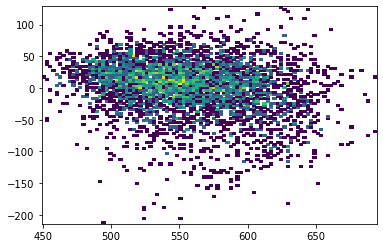

In [79]:
plt.hist2d(xmax_predictions,value,bins=100,norm=matplotlib.colors.LogNorm())
plt.show()

In [80]:
test_xmax = np.array(list(zip(*test_y)))[1]
mass2 = np.array(list(zip(*test_y)))[2]
X_validatioin_new = [np.hstack([i,j]) for i,j in zip(X_validation1,xmax_predictions)]
test_X_new = [np.hstack([i,j]) for i,j in zip(test_X,test_xmax)]

In [81]:
check_predictions = best_model.predict(test_X[:,0:-1])
check_predictions2 = tree.predict(test_X[:,0:-1])

In [82]:
from sklearn.linear_model import LinearRegression

In [83]:
line_model = LinearRegression()

In [84]:
line_model.fit(xmax_predictions.reshape(-1,1),value)

LinearRegression()

In [85]:
joblib.dump(line_model,'Xmax_bias_correction.pkl')

['Xmax_bias_correction.pkl']

In [86]:
bias = line_model.predict(xmax_predictions.reshape(-1,1))
bias2 = line_model.predict(test_xmax.reshape(-1,1))

In [87]:
np.mean([(i-j)**2 for i,j in zip(xmax_predictions,list(zip(*y_validation))[1])])

1752.4747800905511

In [88]:
xmax_predictions = np.array([(i-j) for i,j in zip(xmax_predictions,bias)])
xmax_predictions2 = np.array([(i-j) for i,j in zip(list(zip(*check_predictions))[1],bias2)])
mass_predictions2 = np.array(list(zip(*check_predictions))[-1])

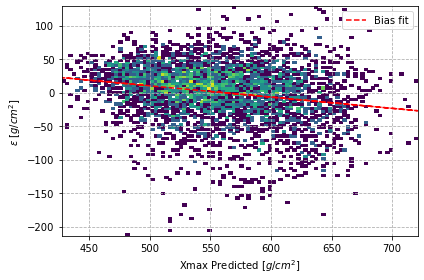

In [89]:
plt.hist2d(xmax_predictions,value,bins=100,norm=matplotlib.colors.LogNorm())
plt.plot(xmax_predictions,bias,color='red',linestyle = 'dashed',label='Bias fit')
plt.xlabel('Xmax Predicted [$g/cm^2$]')
plt.ylabel('$\epsilon$ [$g/cm^2$]')
plt.tight_layout()
plt.legend()
plt.grid(True,linestyle = 'dashed')
plt.savefig('Bias.png')

In [90]:
import matplotlib

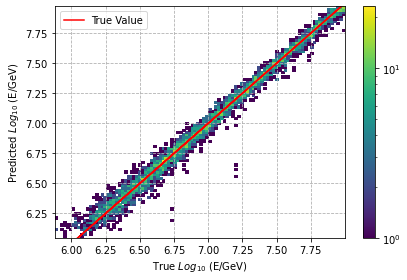

In [91]:
plt.hist2d(energy,energy_predictions,bins=100,norm=matplotlib.colors.LogNorm())
plt.xlabel('True $Log_{10}$ (E/GeV)')
plt.ylabel('Predicted $Log_{10}$ (E/GeV)')
plt.plot(energy,energy,color='r',label='True Value')
plt.colorbar()
plt.legend()
plt.grid(True,linestyle='dashed')
plt.tight_layout()
plt.savefig('Energy_resolution.png')

In [92]:
error_energy = [(i-j)**2 for i,j in zip(energy_predictions,energy)]

In [93]:
hist1 = np.histogram(energy,bins=100)
hist2 = np.histogram(energy_predictions,bins=100)

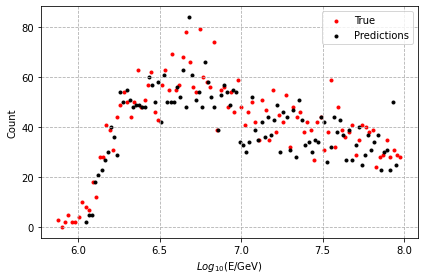

In [94]:
plt.scatter(hist1[1][0:-1],hist1[0],marker='.',color='r',label='True')
plt.scatter(hist2[1][0:-1],hist2[0],marker='.',color='black',label='Predictions')
plt.grid(True,linestyle='dashed')
plt.xlabel('$Log_{10}$(E/GeV)')
plt.ylabel('Count')
plt.legend()
plt.tight_layout()
plt.savefig('Validation_energy.png')

/home/andy/anaconda3/lib/python3.7/site-packages/numpy/core/fromnumeric.py:3373: RuntimeWarning: Mean of empty slice.
  out=out, **kwargs)
/home/andy/anaconda3/lib/python3.7/site-packages/numpy/core/_methods.py:170: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)
/home/andy/anaconda3/lib/python3.7/site-packages/numpy/core/_methods.py:234: RuntimeWarning: Degrees of freedom <= 0 for slice
  keepdims=keepdims)
/home/andy/anaconda3/lib/python3.7/site-packages/numpy/core/_methods.py:195: RuntimeWarning: invalid value encountered in true_divide
  arrmean, rcount, out=arrmean, casting='unsafe', subok=False)
/home/andy/anaconda3/lib/python3.7/site-packages/numpy/core/_methods.py:226: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)


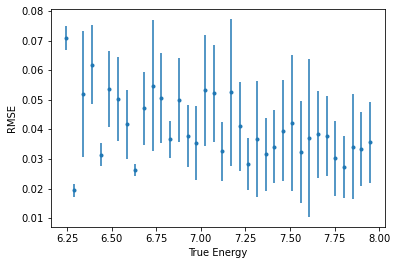

In [95]:
mean_list,mean_overall,std_mean,bins,median,ten,ninety,FWHM = binning2(np.array(energy)[X_validation[:,-1]!=0],np.array(error_energy)[X_validation[:,-1]!=0],bins=40)
rmse_new = [i**0.5 for i in mean_overall]
std_new = [(1/(2*mean))*sigma/2 for mean,sigma in zip(rmse_new,std_mean)]
plt.errorbar(bins,rmse_new,yerr=np.array(std_new),fmt='.')
plt.xlabel('True Energy')
plt.ylabel('RMSE')
plt.savefig('Energy_waveformsonly.png')

In [96]:
mean_list,mean_overall,std_mean,bins,median,ten,ninety,FWHM = binning2(np.array(energy),np.array(error_energy),bins=40)

In [97]:
rmse_new = [i**0.5 for i in mean_overall]

In [98]:
std_new = [(1/(2*mean))*sigma/2 for mean,sigma in zip(rmse_new,std_mean)]

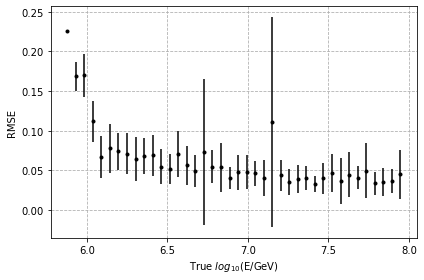

In [99]:
plt.errorbar(bins,rmse_new,yerr=np.array(std_new),fmt='.',color='black')
plt.xlabel('True $log_{10}$(E/GeV)')
plt.ylabel('RMSE')
plt.grid(True,linestyle='dashed')
plt.tight_layout()
plt.savefig('RMSE_Energy.png')

In [100]:
np.corrcoef(energy,energy_predictions)[0][1]

0.9937423513755677

In [101]:
print(np.mean([(i-j)**2 for i,j in zip(energy,energy_predictions)])**0.5)

0.057814299660346596


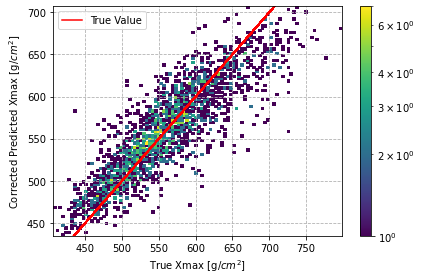

In [102]:
plt.hist2d(test_xmax,np.hstack(xmax_predictions2),bins=100,norm=matplotlib.colors.LogNorm())
plt.plot(test_xmax,test_xmax,color='r',label='True Value')
plt.xlabel('True Xmax [g/$cm^2$]')
plt.ylabel('Corrected Predicted Xmax [g/$cm^2$]')
plt.legend()
plt.colorbar()
plt.tight_layout()
plt.grid(True,linestyle='dashed')
plt.savefig('True_vs_predicted_after.png')

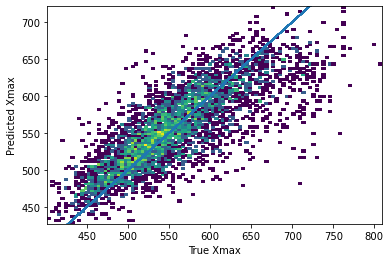

In [103]:
plt.hist2d(xmax,xmax_predictions,bins=100,norm=matplotlib.colors.LogNorm())
plt.plot(xmax,xmax)
plt.xlabel('True Xmax')
plt.ylabel('Predicted Xmax')
plt.show()

In [104]:
hist1 = np.histogram(xmax,bins=100)
hist2 = np.histogram(xmax_predictions,bins=hist1[1])

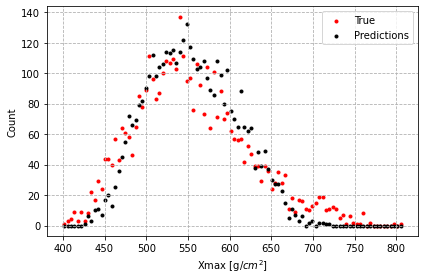

In [105]:
plt.scatter(hist1[1][0:-1],hist1[0],marker='.',color='r',label='True')
plt.scatter(hist2[1][0:-1],hist2[0],marker='.',color='black',label='Predictions')
plt.grid(True,linestyle='dashed')
plt.xlabel('Xmax [g/$cm^2$]')
plt.ylabel('Count')
plt.legend()
plt.tight_layout()
plt.savefig('Validation_xmax.png')

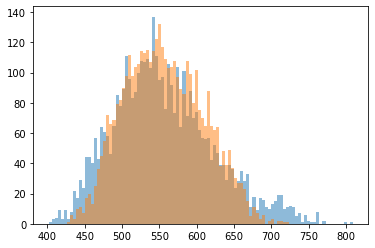

In [106]:
plt.hist(xmax,bins=100,alpha=0.5)
plt.hist(xmax_predictions,bins=hist1[1],alpha=0.5)
plt.show()

In [107]:
error_xmax = [(i-j)**2 for i,j in zip(test_xmax,xmax_predictions2)]

In [108]:
mean_list,mean_overall,std_mean,bins,median,ten,ninety,FWHM = binning2(np.array(test_xmax),np.array(error_xmax),bins=40)

/home/andy/anaconda3/lib/python3.7/site-packages/numpy/core/fromnumeric.py:3373: RuntimeWarning: Mean of empty slice.
  out=out, **kwargs)
/home/andy/anaconda3/lib/python3.7/site-packages/numpy/core/_methods.py:170: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)
/home/andy/anaconda3/lib/python3.7/site-packages/numpy/core/_methods.py:234: RuntimeWarning: Degrees of freedom <= 0 for slice
  keepdims=keepdims)
/home/andy/anaconda3/lib/python3.7/site-packages/numpy/core/_methods.py:195: RuntimeWarning: invalid value encountered in true_divide
  arrmean, rcount, out=arrmean, casting='unsafe', subok=False)
/home/andy/anaconda3/lib/python3.7/site-packages/numpy/core/_methods.py:226: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)


In [109]:
rmse_new = [i**0.5 for i in mean_overall]
std_new = [(1/(2*mean))*sigma/2 for mean,sigma in zip(rmse_new,std_mean)]

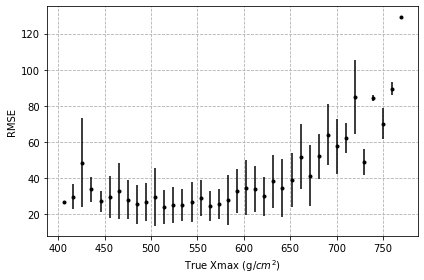

In [110]:
plt.errorbar(bins,rmse_new,yerr=np.array(std_new),fmt='.',color='black')
plt.xlabel('True Xmax (g/$cm^2$)')
plt.ylabel('RMSE')
plt.grid(True,linestyle='dashed')
plt.tight_layout()
plt.savefig('RMSE_Xmax.png')

In [111]:
np.sum(test_X[:,-1]!=0)/len(test_X)

0.2671922908453789

In [112]:
mean_list,mean_overall,std_mean,bins,median,ten,ninety,FWHM = binning2(np.array(test_xmax)[test_X[:,-1]!=0],np.array(error_xmax)[test_X[:,-1]!=0],bins=40)

In [113]:
rmse_new = [i**0.5 for i in mean_overall]
std_new = [(1/(2*mean))*sigma/2 for mean,sigma in zip(rmse_new,std_mean)]

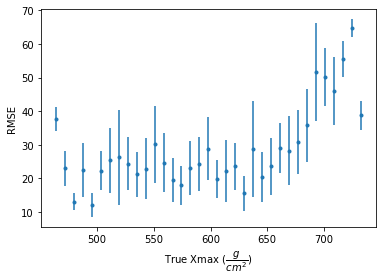

In [114]:
plt.errorbar(bins,rmse_new,yerr=np.array(std_new),fmt='.')
plt.xlabel('True Xmax ($\\dfrac{g}{cm^2})$')
plt.ylabel('RMSE')
plt.savefig('RMSE_linear_onlywaveforms.png')

In [115]:
np.corrcoef(xmax,xmax_predictions)[0][1]

0.7887615384586599

In [116]:
mean_list,mean_xmax,std_xmax,bins_xmax,median_xmax,ten_xmax,ninety_xmax,FWHM = binning2(xmax,xmax_predictions,20,confidence_interval=2)

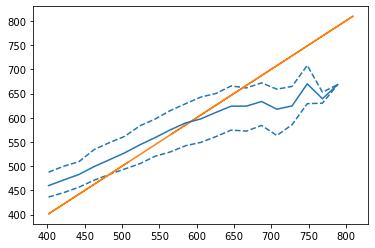

In [117]:
plot = plt.errorbar(bins_xmax,mean_xmax,label='proton')
color = plot[0].get_color()
plt.plot(bins_xmax,ten_xmax,linestyle='dashed',color=color)
plt.plot(bins_xmax,ninety_xmax,linestyle='dashed',color=color)
plt.plot(xmax,xmax)
plt.show()

In [118]:
mse = np.mean([(i-j)**2 for i,j in zip(xmax,xmax_predictions)])
print(mse**0.5)

40.917768074280396


In [119]:
mse

1674.2637441806

# Checking Composition Plots

In [120]:
check = (energy_predictions>=0)

In [121]:
mass = mass[check]

In [122]:
energy = np.array(energy)

In [123]:
iron_energy = predictions2[mass==4]
proton_energy = predictions2[mass==1]
helium_energy = predictions2[mass==2]
oxygen_energy= predictions2[mass==3]

In [124]:
iron_xmax = np.array(xmax_predictions)[mass==4]
proton_xmax = np.array(xmax_predictions)[mass==1]
helium_xmax = np.array(xmax_predictions)[mass==2]
oxygen_xmax = np.array(xmax_predictions)[mass==3]

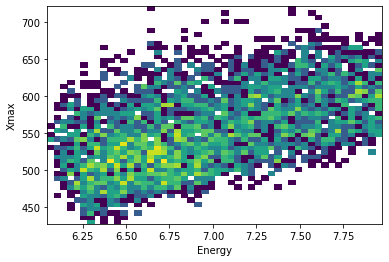

In [125]:
Xmax_predicted = xmax_predictions
check = (Xmax_predicted>400)&(Xmax_predicted<900)
plt.hist2d(predictions2[check],Xmax_predicted[check],bins=50,norm=matplotlib.colors.LogNorm())
plt.xlabel('Energy')
plt.ylabel('Xmax')
#plt.savefig('Xmax_energy_after.png')
plt.show()

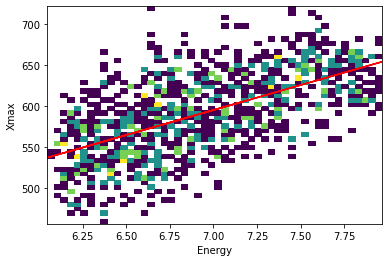

60.82592982581584 169.16320565743032


In [126]:
Xmax_predicted = proton_xmax
check_proton = (Xmax_predicted>400)&(Xmax_predicted<900)
fit_proton = curve_fit(line_function,proton_energy[check_proton],Xmax_predicted[check_proton])
output_xmax_proton = line_function(proton_energy[check_proton],fit_proton[0][0],fit_proton[0][1])

plt.hist2d(proton_energy[check_proton],Xmax_predicted[check_proton],bins=50,norm=matplotlib.colors.LogNorm())
plt.plot(proton_energy[check_proton],output_xmax_proton,color='red')
plt.xlabel('Energy')
plt.ylabel('Xmax')
#plt.savefig('Xmax_energy_after.png')
plt.show()

print(fit_proton[0][0],fit_proton[0][1])

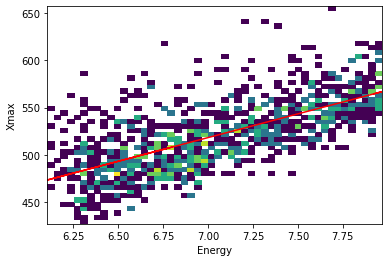

50.24020218713709 166.57175339053336


In [127]:
Xmax_predicted = iron_xmax
check_iron = (Xmax_predicted>400)&(Xmax_predicted<900)
fit_iron = curve_fit(line_function,iron_energy[check_iron],Xmax_predicted[check_iron])
output_xmax_iron = line_function(iron_energy[check_iron],fit_iron[0][0],fit_iron[0][1])

plt.hist2d(iron_energy[check_iron],Xmax_predicted[check_iron],bins=50,norm=matplotlib.colors.LogNorm())
plt.plot(iron_energy[check_iron],output_xmax_iron,color='red')
plt.xlabel('Energy')
plt.ylabel('Xmax')
#plt.savefig('Xmax_energy_after.png')
plt.show()

print(fit_iron[0][0],fit_iron[0][1])

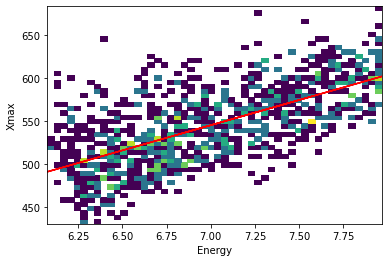

58.42660095732693 136.01309760841264


In [128]:
Xmax_predicted = oxygen_xmax
check_oxygen = (Xmax_predicted>400)&(Xmax_predicted<900)
fit = curve_fit(line_function,oxygen_energy[check_oxygen],Xmax_predicted[check_oxygen])
output_xmax_oxygen = line_function(oxygen_energy[check_oxygen],fit[0][0],fit[0][1])

plt.hist2d(oxygen_energy[check_oxygen],Xmax_predicted[check_oxygen],bins=50,norm=matplotlib.colors.LogNorm())
plt.plot(oxygen_energy[check_oxygen],output_xmax_oxygen,color='red')
plt.xlabel('Energy')
plt.ylabel('Xmax')
#plt.savefig('Xmax_energy_after.png')
plt.show()

print(fit[0][0],fit[0][1])

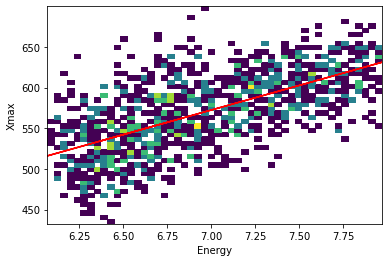

60.53266856488464 148.6128438181877


In [129]:
Xmax_predicted = helium_xmax
check_helium = (Xmax_predicted>400)&(Xmax_predicted<900)
fit = curve_fit(line_function,helium_energy[check_helium],Xmax_predicted[check_helium])
output_xmax_helium = line_function(helium_energy[check_helium],fit[0][0],fit[0][1])

plt.hist2d(helium_energy[check_helium],Xmax_predicted[check_helium],bins=50,norm=matplotlib.colors.LogNorm())
plt.plot(helium_energy[check_helium],output_xmax_helium,color='red')
plt.xlabel('Energy')
plt.ylabel('Xmax')
#plt.savefig('Xmax_energy_after.png')
plt.show()

print(fit[0][0],fit[0][1])

In [130]:
plot = False
bins = 10
mean_list_proton,mean_proton,std_proton,bins_proton,median_proton,ten_proton,ninety_proton,FWHM = binning2(proton_energy,proton_xmax,bins)
mean_list_iron,mean_iron,std_iron,bins_iron,median_iron,ten_iron,ninety_iron,FWHM = binning2(iron_energy,iron_xmax,bins,bins_input=list(bins_proton))
mean_list_oxygen,mean_oxygen,std_oxygen,bins_oxygen,median_oxygen,ten_oxygen,ninety_oxygen,FWHM = binning2(oxygen_energy,oxygen_xmax,bins,bins_input=bins_proton)
mean_list_helium,mean_helium,std_helium,bins_helium,median_helium,ten_helium,ninety_helium,FWHM = binning2(helium_energy,helium_xmax,bins,bins_input=bins_proton)

In [131]:
len(proton_energy)

1016

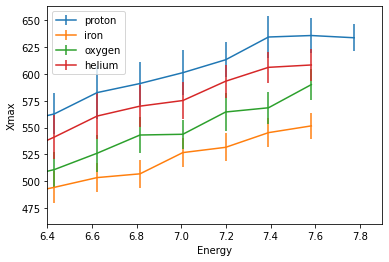

In [132]:
plt.errorbar(bins_proton,mean_proton,yerr=std_proton/2,label='proton')
plt.errorbar(bins_iron,mean_iron,yerr=std_iron/2,label='iron')
plt.errorbar(bins_oxygen,mean_oxygen,yerr=std_oxygen/2,label='oxygen')
plt.errorbar(bins_helium,mean_helium,yerr=std_helium/2,label='helium')
plt.legend()
plt.xlabel('Energy')
plt.ylabel('Xmax')
plt.xlim(6.4,7.9)
plt.savefig('All_species_energy_xmax.png')
#plt.show()

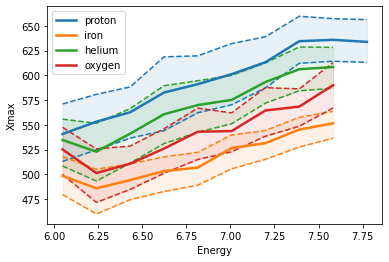

In [133]:
plot = plt.errorbar(bins_proton,mean_proton,label='proton',linewidth=2.5)
color = plot[0].get_color()
plt.plot(bins_proton,ten_proton,linestyle='dashed',color=color)
plt.plot(bins_proton,ninety_proton,linestyle='dashed',color=color)
plt.fill_between(bins_proton,(ten_proton),(ninety_proton),alpha=0.1,color=color)

plot = plt.errorbar(bins_iron,mean_iron,label='iron',linewidth=2.5)
color = plot[0].get_color()
plt.plot(bins_iron,ten_iron,linestyle='dashed',color=color)
plt.plot(bins_iron,ninety_iron,linestyle='dashed',color=color)
plt.fill_between(bins_iron,(ten_iron),(ninety_iron),alpha=0.1,color=color)

plot = plt.errorbar(bins_helium,mean_helium,label='helium',linewidth=2.5)
color = plot[0].get_color()
plt.plot(bins_helium,ten_helium,linestyle='dashed',color=color)
plt.plot(bins_helium,ninety_helium,linestyle='dashed',color=color)
plt.fill_between(bins_helium,(ten_helium),(ninety_helium),alpha=0.1,color=color)

plot = plt.errorbar(bins_oxygen,mean_oxygen,label='oxygen',linewidth=2.5)
color = plot[0].get_color()
plt.plot(bins_oxygen,ten_oxygen,linestyle='dashed',color=color)
plt.plot(bins_oxygen,ninety_oxygen,linestyle='dashed',color=color)
plt.fill_between(bins_oxygen,(ten_oxygen),(ninety_oxygen),alpha=0.1,color=color)

plt.legend()
plt.xlabel('Energy')
plt.ylabel('Xmax')
plt.savefig('New_plot.png')

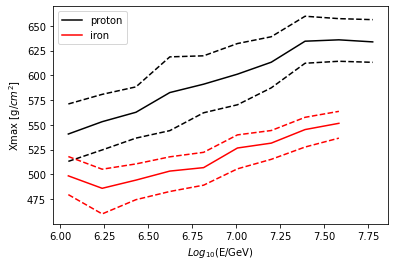

In [134]:
plot = plt.errorbar(bins_proton,mean_proton,label='proton',color='black')
color = plot[0].get_color()
plt.plot(bins_proton,ten_proton,linestyle='dashed',color=color)
plt.plot(bins_proton,ninety_proton,linestyle='dashed',color=color)

plot = plt.errorbar(bins_iron,mean_iron,label='iron',color='red')
color = plot[0].get_color()
plt.plot(bins_iron,ten_iron,linestyle='dashed',color=color)
plt.plot(bins_iron,ninety_iron,linestyle='dashed',color=color)

#plt.scatter(bins_data,mean_data)
plt.legend()
plt.xlabel('$Log_{10}$(E/GeV)')
plt.ylabel('Xmax [g/$cm^2$]')
#plt.savefig('Proton_vs_Iron.png')
plt.savefig('Proton_vs_Iron.png')

In [135]:
#mean_data,std_data,bins_data,median_data,ten_data,ninety_data = binning(energy,xmax_data_corrected,bins=20)

In [136]:
matplotlib.rcParams.update({'font.size': 14})

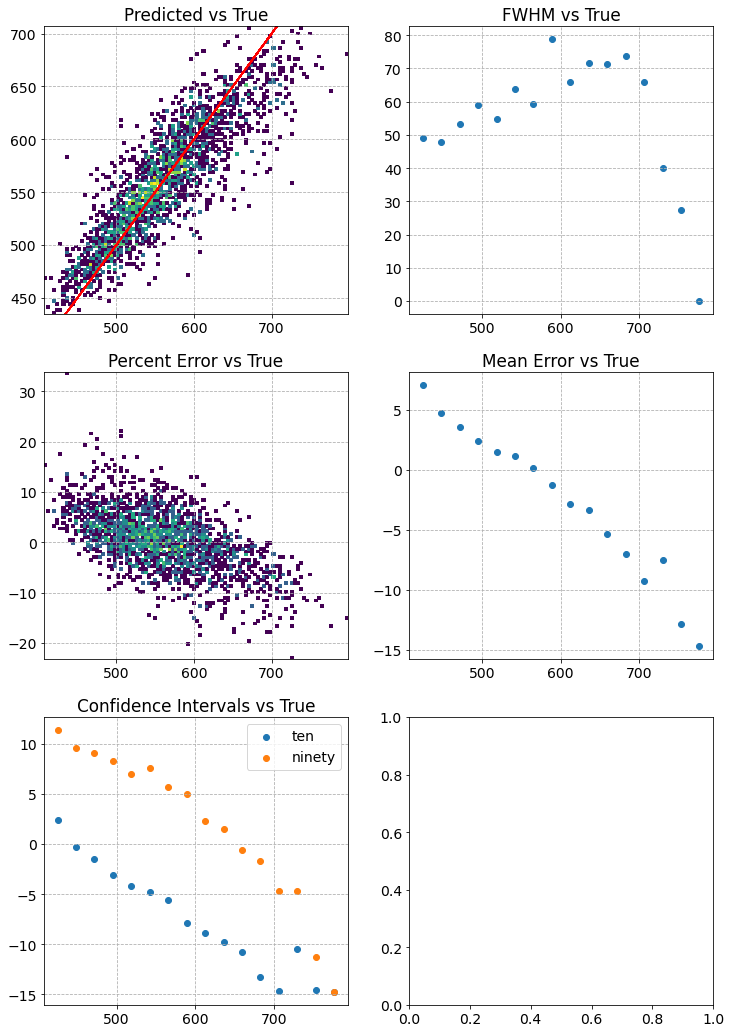

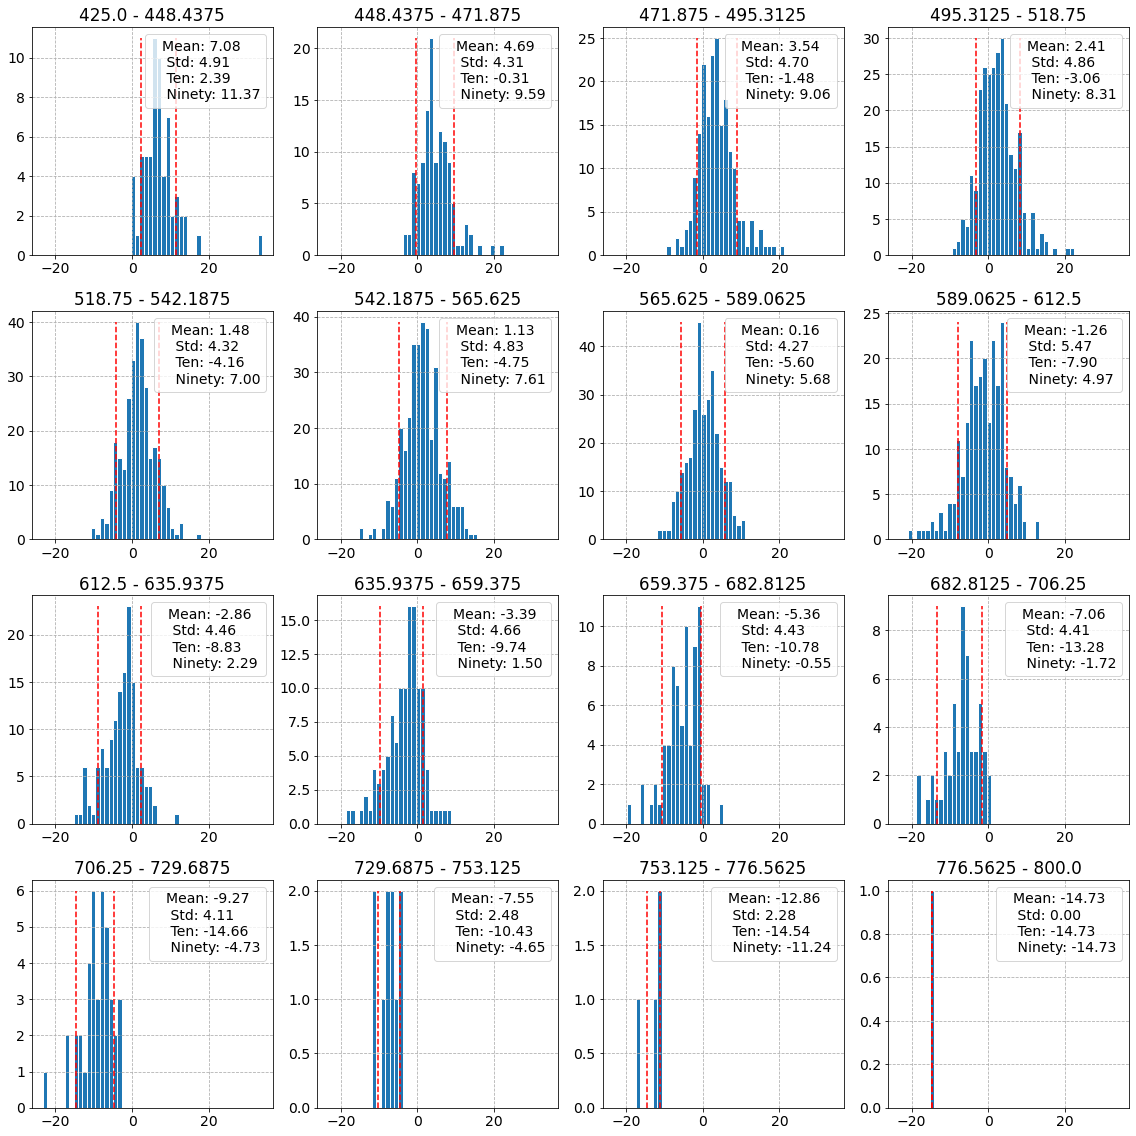

In [137]:
plot_function(test_xmax,np.hstack(xmax_predictions2),425,800,50,16,'Xmax')

In [138]:
print(len(energy))

4109


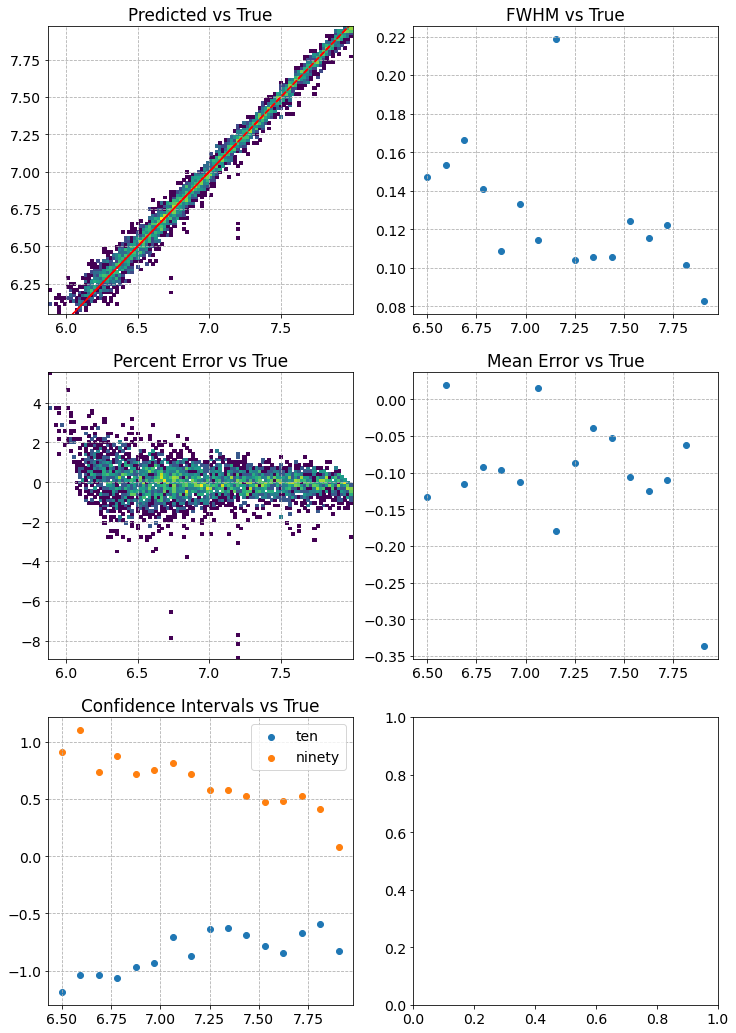

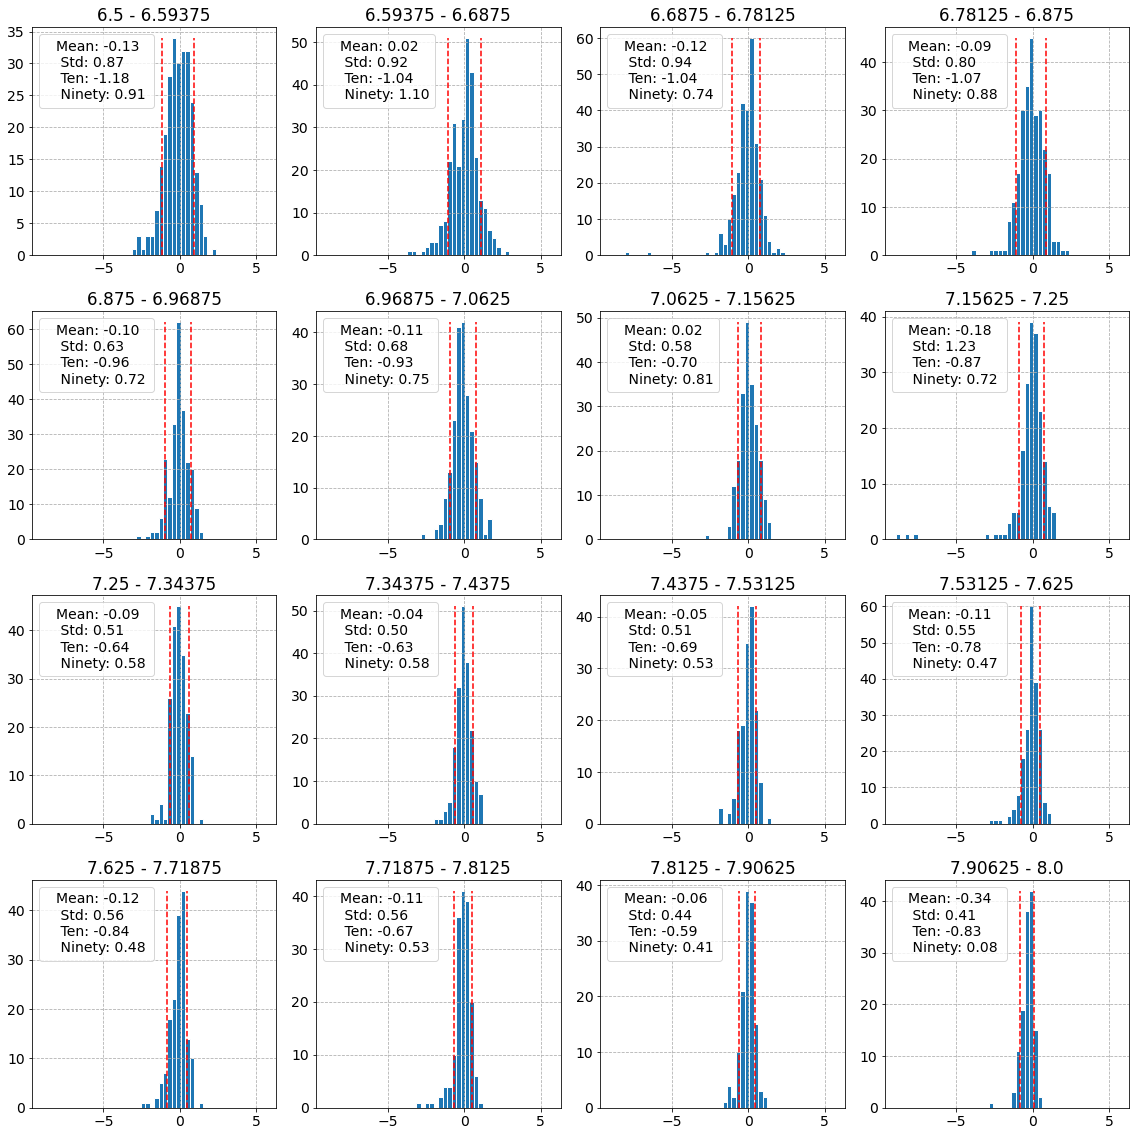

In [139]:
plot_function(energy,energy_predictions,6.5,8,50,16,'Energy')

In [140]:
mass_check = np.array(list(zip(*y_validation))[-1])
mass_check2 = np.array(list(zip(*test_y))[-1])

In [141]:
import seaborn as sns
from seaborn import kdeplot

In [142]:
energy_true = list(zip(*test_y))[0]
energy_bins = np.linspace(6.5,8,7)

In [143]:
xmax_true = np.array(list(zip(*test_y))[1])

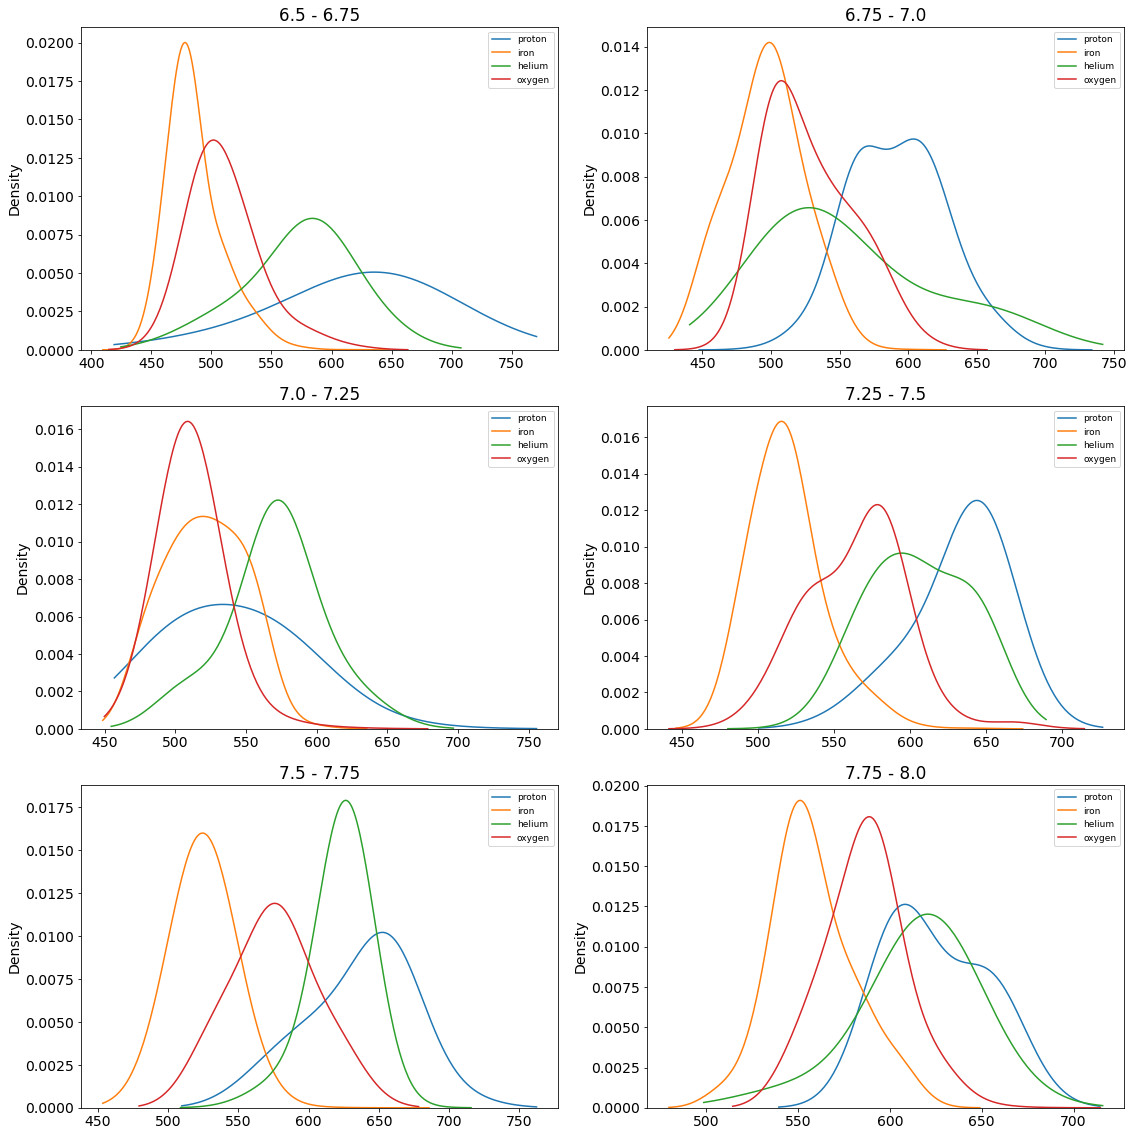

In [144]:
fig, axs = plt.subplots(3,2,figsize=(16,16))
count = 0
for k in range(3):
    for m in range(2):
        energy_check = []
        for j in energy:
            if (j>energy_bins[count])&(j<energy_bins[count+1]):
                energy_check.append(True)
            else:
                energy_check.append(False)
        weights = np.array([1/abs(i-j) for i,j in zip(xmax_predictions,y_validation[:,1])])
        kdeplot(xmax_predictions[(mass_check==1)&(energy_check)],label='proton',ax=axs[k][m],weights = weights[(mass_check==1)&(energy_check)])
        kdeplot(xmax_predictions[(mass_check==4)&(energy_check)],label='iron',ax=axs[k][m],weights = weights[(mass_check==4)&(energy_check)])
        kdeplot(xmax_predictions[(mass_check==2)&(energy_check)],label='helium',ax=axs[k][m],weights = weights[(mass_check==2)&(energy_check)])
        kdeplot(xmax_predictions[(mass_check==3)&(energy_check)],label='oxygen',ax=axs[k][m],weights = weights[(mass_check==3)&(energy_check)])
        axs[k][m].set_title('%s - %s'%(energy_bins[count],energy_bins[count+1]))
        axs[k][m].legend(prop={'size':9})
        count+=1
plt.tight_layout()


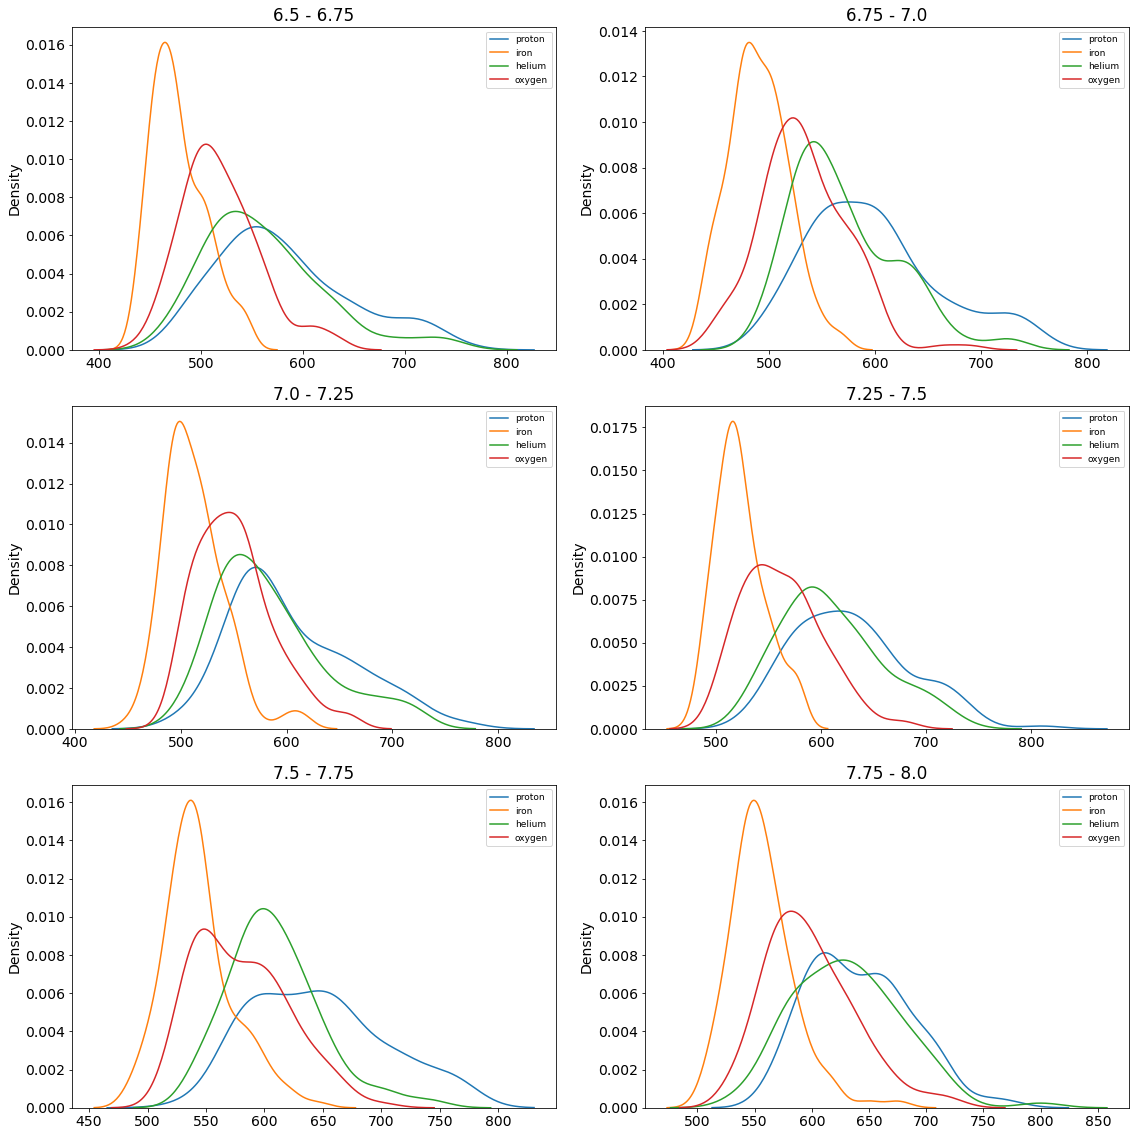

In [145]:
fig, axs = plt.subplots(3,2,figsize=(16,16))
count = 0
for k in range(3):
    for m in range(2):
        energy_check = []
        for j in energy:
            if (j>energy_bins[count])&(j<energy_bins[count+1]):
                energy_check.append(True)
            else:
                energy_check.append(False)
        kdeplot(xmax[(mass_check==1)&(energy_check)],label='proton',ax=axs[k][m])
        kdeplot(xmax[(mass_check==4)&(energy_check)],label='iron',ax=axs[k][m])
        kdeplot(xmax[(mass_check==2)&(energy_check)],label='helium',ax=axs[k][m])
        kdeplot(xmax[(mass_check==3)&(energy_check)],label='oxygen',ax=axs[k][m])
        axs[k][m].set_title('%s - %s'%(energy_bins[count],energy_bins[count+1]))
        axs[k][m].legend(prop={'size':9})
        count+=1
plt.tight_layout()
plt.savefig('Xmax_true_kde_wo_mass.png')

In [146]:
energy_values = [(energy_bins[i] + energy_bins[i+1])/2 for i in range(len(energy_bins)-1)]

In [147]:
iron_validation2 = cut_values(y_validation[:,0],mass=y_validation[:,-1],mass_value=4)
proton_validation2 = cut_values(y_validation[:,0],mass=y_validation[:,-1],mass_value=1)
helium_validation2 = cut_values(y_validation[:,0],mass=y_validation[:,-1],mass_value=2)
oxygen_validation2 = cut_values(y_validation[:,0],mass=y_validation[:,-1],mass_value=3)

In [148]:
count_dict = {'energy':np.linspace(6.5,8,11)[0:-1],
             'iron_total':iron_cut1,
             'helium_total':helium_cut1,
             'proton_total':proton_cut1,
             'oxygen_total':oxygen_cut1,
              'iron_cut1':iron_cut2,
             'helium_cut1':helium_cut2,
             'proton_cut1':proton_cut2,
             'oxygen_cut1':oxygen_cut2,
              'iron_train':iron_train,
             'helium_train':helium_train,
             'proton_train':proton_train,
             'oxygen_train':oxygen_train,
              'iron_validation':iron_validation,
             'helium_validation':helium_validation,
             'proton_validation':proton_validation,
             'oxygen_validation':oxygen_validation,
              'iron_test':iron_test,
             'helium_test':helium_test,
             'proton_test':proton_test,
             'oxygen_test':oxygen_test,
              'iron_final':iron_validation2,
             'helium_final':helium_validation2,
             'proton_final':proton_validation2,
             'oxygen_final':oxygen_validation2
             }

In [149]:
df_count = pd.DataFrame(count_dict)

In [150]:
df_count.head(10)

,energy,iron_total,helium_total,proton_total,oxygen_total,iron_cut1,helium_cut1,proton_cut1,oxygen_cut1,iron_train,...,proton_validation,oxygen_validation,iron_test,helium_test,proton_test,oxygen_test,iron_final,helium_final,proton_final,oxygen_final
0,6.50,2073,2193,2157,1920,545,588,541,518,382,...,106,91,45,55,52,52,118,108,106,91
1,6.65,2038,2474,2229,2432,514,662,667,651,364,...,113,120,52,68,58,69,98,123,113,120
2,6.80,2198,2188,2159,2086,584,566,523,540,428,...,91,100,44,60,51,59,112,83,91,100
3,6.95,1366,1266,1382,1384,532,442,494,503,388,...,81,84,57,48,55,53,87,81,81,84
4,7.10,846,912,956,872,432,422,481,407,310,...,81,74,41,39,60,43,81,80,81,74
5,7.25,878,945,906,1042,396,456,411,479,282,...,73,71,41,45,36,51,73,85,73,71
6,7.40,952,904,825,950,403,381,353,448,302,...,67,72,39,40,39,50,62,68,67,72
7,7.55,1014,925,995,1046,410,340,374,440,291,...,72,79,36,38,53,51,83,62,72,79
8,7.70,997,980,969,1002,366,354,285,351,258,...,49,60,37,26,26,35,71,71,49,60
9,7.85,1014,934,1097,965,291,245,301,311,199,...,45,63,29,23,38,25,63,37,45,63


In [151]:
df_count.to_csv('cut_values.csv')

In [152]:
len(data)

44212

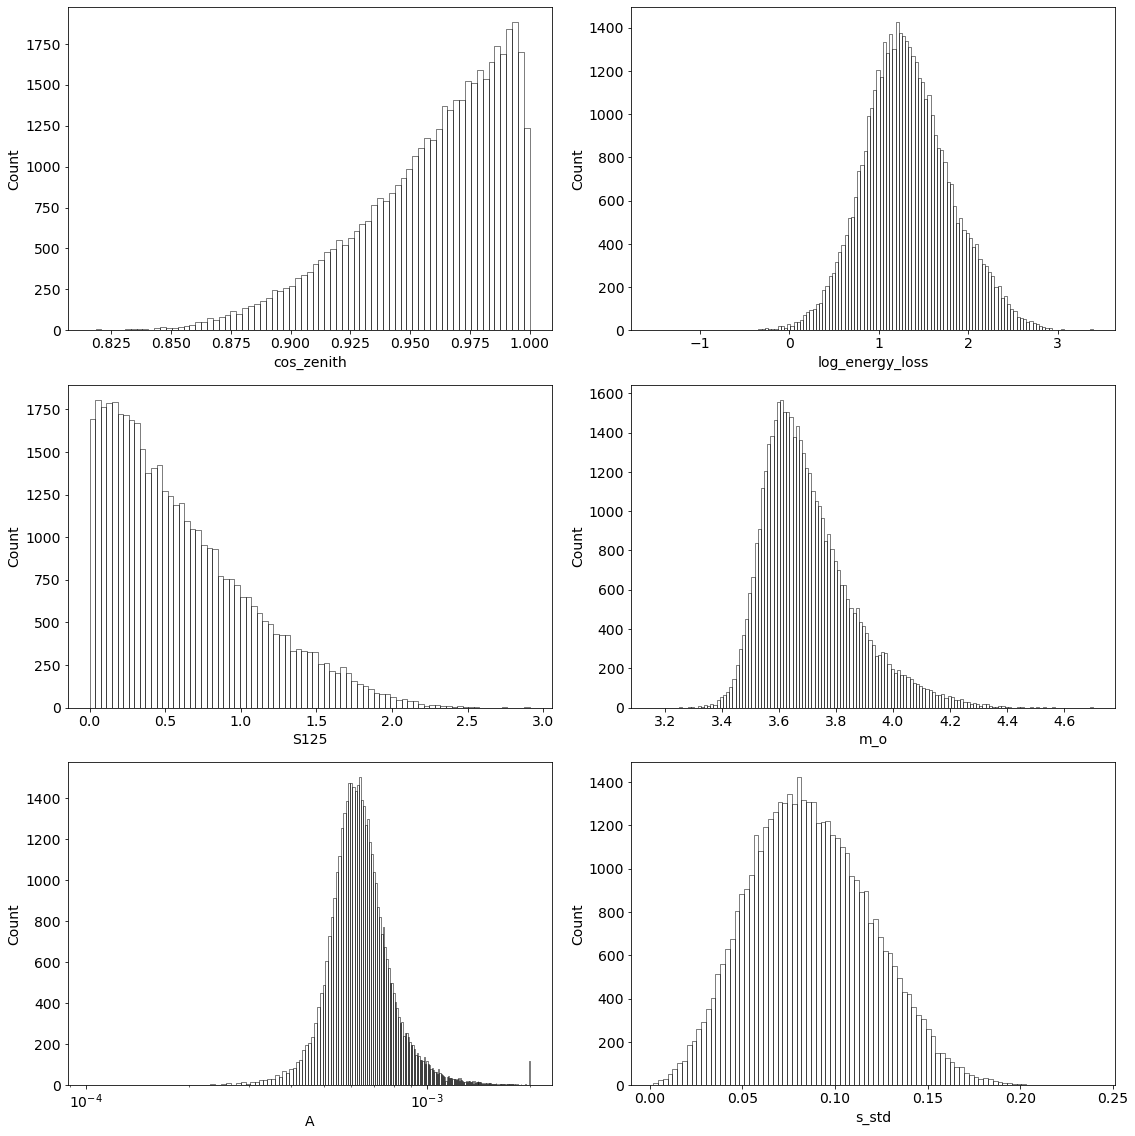

In [153]:
fig,axs = plt.subplots(3,2,figsize = (16,16))
count = 0
count2 = 0
for i in ['cos_zenith','log_energy_loss','S125','m_o','A','s_std']:
    sns.histplot(data_coinc[i],ax = axs[count,count2],fill=False,color='black')
    if i == 'A':
        axs[count,count2].set_xscale('log')
    count2 += 1
    if count2 == 2:
        count2 = 0
        count += 1
plt.tight_layout()
plt.savefig('Data_histograms.png')

In [154]:
from seaborn import distplot

/home/andy/anaconda3/lib/python3.7/site-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)
/home/andy/anaconda3/lib/python3.7/site-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)
/home/andy/anaconda3/lib/python3.7/site-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar fle

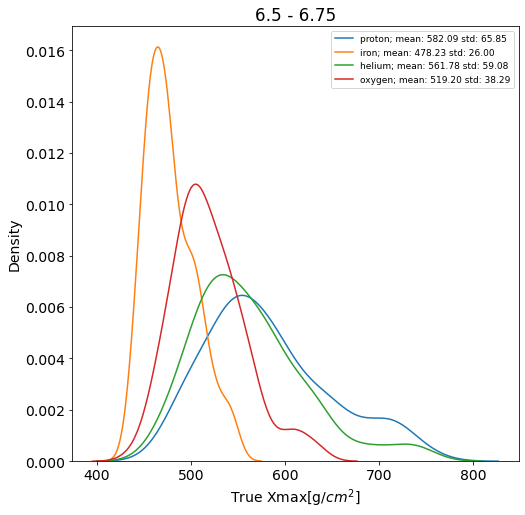

In [155]:
fig, axs = plt.subplots(1,1,figsize=(8,8))
count = 0

k = 0
m = 0

energy_check = []
for j in energy:
    if (j>energy_bins[count])&(j<energy_bins[count+1]):
        energy_check.append(True)
    else:
        energy_check.append(False)

distplot(xmax[(mass_check==1)&(energy_check)],label='proton; mean: %.2f std: %.2f'%(np.mean(xmax[(mass_check==1)&(energy_check)]),np.std(xmax[(mass_check==1)&(energy_check)])),ax=axs, hist=False)
distplot(xmax[(mass_check==4)&(energy_check)],label='iron; mean: %.2f std: %.2f'%(np.mean(xmax[(mass_check==4)&(energy_check)]),np.std(xmax[(mass_check==4)&(energy_check)])),ax=axs, hist=False)
distplot(xmax[(mass_check==2)&(energy_check)],label='helium; mean: %.2f std: %.2f'%(np.mean(xmax[(mass_check==2)&(energy_check)]),np.std(xmax[(mass_check==2)&(energy_check)])),ax=axs, hist=False)
distplot(xmax[(mass_check==3)&(energy_check)],label='oxygen; mean: %.2f std: %.2f'%(np.mean(xmax[(mass_check==3)&(energy_check)]),np.std(xmax[(mass_check==3)&(energy_check)])),ax=axs, hist= False)
axs.set_xlabel('True Xmax[g/$cm^2$]')
axs.set_title('%s - %s'%(energy_bins[count],energy_bins[count+1]))
axs.legend(prop={'size':9})

plt.savefig('Xmax_true_plot.png')

In [156]:
from seaborn import scatterplot

In [157]:
model = LinearRegression()

In [158]:
A = np.array(list(zip(*X_validation))[9])

/home/andy/anaconda3/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/home/andy/anaconda3/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


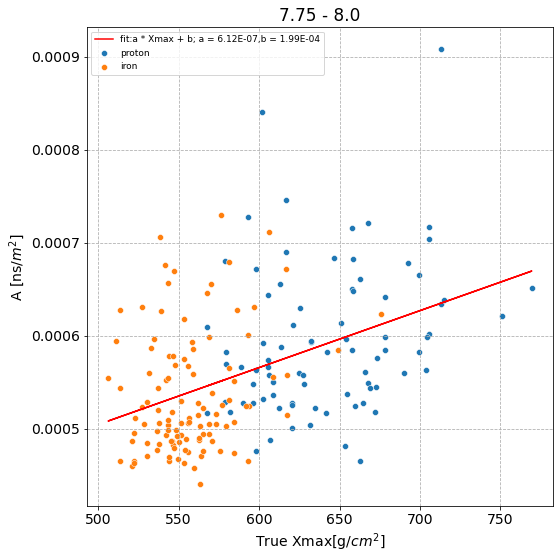

In [159]:
fig, axs = plt.subplots(1,1,figsize=(8,8))
count = 5

k = 0
m = 0

energy_check = []
for j in energy:
    if (j>energy_bins[count])&(j<energy_bins[count+1]):
        energy_check.append(True)
    else:
        energy_check.append(False)
        
model.fit(xmax[((mass_check==1)|(mass_check==4))&(energy_check)].reshape(-1,1),A[((mass_check==1)|(mass_check==4))&(energy_check)])
predict_new = model.predict(xmax[((mass_check==1)|(mass_check==4))&(energy_check)].reshape(-1,1))

scatterplot(xmax[(mass_check==1)&(energy_check)],A[(mass_check==1)&(energy_check)],label='proton',ax=axs)
scatterplot(xmax[(mass_check==4)&(energy_check)],A[(mass_check==4)&(energy_check)],label='iron',ax=axs)
plt.plot(xmax[((mass_check==1)|(mass_check==4))&(energy_check)],predict_new,color='red',label='fit:a * Xmax + b; a = %.2E,b = %.2E'%(model.coef_,model.intercept_))

axs.set_xlabel('True Xmax[g/$cm^2$]')
axs.set_ylabel('A [ns/$m^2$]')
axs.set_title('%s - %s'%(energy_bins[count],energy_bins[count+1]))
axs.legend(prop={'size':9})
axs.grid(True,linestyle='--')
plt.tight_layout()
#axs.set_ylim(1e-10,5e-3)

plt.savefig('Xmax_curvature_plot.png')